In [2]:
# Library imports
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import joblib
from imblearn.metrics import classification_report_imbalanced
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load dataset
df = pd.read_csv('water_quality_data.csv')

In [4]:
# Display first few rows of the dataset
print(df.head(20))
print("")

# Check dimensions of the dataset
print(df.shape)
print("")

# Overview of columns and data types
print(df.info())

    Temperature (°C)        pH   TDS (ppm)   EC (NTU)       Quality  \
0          24.355958  7.110028  320.433566  33.130509          Good   
1          24.994462  7.102444  347.346481  93.962892          Good   
2          47.702188  6.615165  147.265513  47.498473     Excellent   
3          35.387604  8.469192   88.526085  85.574234          Poor   
4          38.187216  7.757296   93.406588  36.786060          Poor   
5           5.746801  6.325644  660.418241  30.844390  Unacceptable   
6           6.276651  7.747430  983.783371  37.219014          Poor   
7          30.162170  7.459212  798.195683  63.831422      Moderate   
8          23.211798  7.454563  951.534898  76.325840          Poor   
9          13.471511  7.640648  293.463754  12.121530          Poor   
10         17.294564  7.113320   81.379712  42.669480     Excellent   
11         27.205849  7.393622  143.882317   7.263803     Excellent   
12          9.478007  8.394151  906.276472  36.851629          Poor   
13    

In [5]:
# Summary statistics
print(df.describe())

       Temperature (°C)           pH    TDS (ppm)     EC (NTU)
count       5000.000000  5000.000000  5000.000000  5000.000000
mean          25.205965     7.483849   500.810735    50.026289
std           14.487619     0.868429   290.509757    29.046421
min            0.013022     6.000108     0.047875     0.041311
25%           12.598844     6.738646   248.138993    24.438307
50%           25.517562     7.466880   506.141106    50.105367
75%           37.955296     8.223293   751.479698    74.970101
max           49.987301     8.999738   999.914433    99.976059


In [6]:
# Count missing values
print(df.isnull().sum())

Temperature (°C)       0
pH                     0
TDS (ppm)              0
EC (NTU)               0
Quality                0
Quality Description    0
dtype: int64


In [7]:
# Handle missing values (e.g., fill with mean, median, or mode)
df['Temperature (°C)'] = df['Temperature (°C)'].fillna(df['Temperature (°C)'].mean())
df['pH'] = df['pH'].fillna(df['pH'].mean())
df['TDS (ppm)'] = df['TDS (ppm)'].fillna(df['TDS (ppm)'].mean())
df['EC (NTU)'] = df['EC (NTU)'].fillna(df['EC (NTU)'].mean())

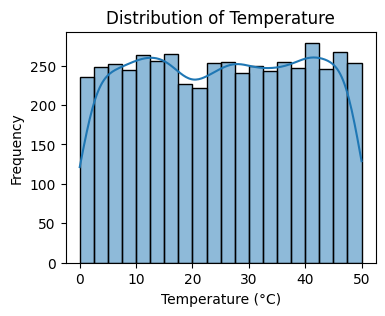

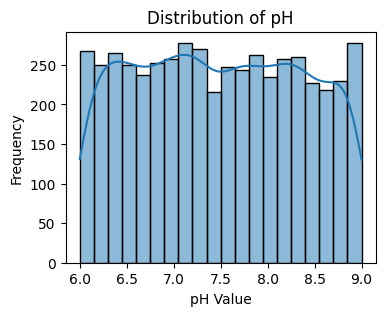

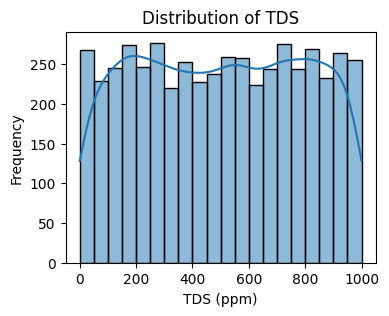

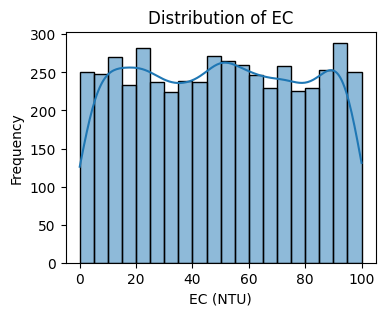

In [8]:
plt.figure(figsize=(4, 3))
sns.histplot(df['Temperature (°C)'], bins=20, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(4, 3))
sns.histplot(df['pH'], bins=20, kde=True)
plt.title('Distribution of pH')
plt.xlabel('pH Value')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(4, 3))
sns.histplot(df['TDS (ppm)'], bins=20, kde=True)
plt.title('Distribution of TDS')
plt.xlabel('TDS (ppm)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(4, 3))
sns.histplot(df['EC (NTU)'], bins=20, kde=True)
plt.title('Distribution of EC')
plt.xlabel('EC (NTU)')
plt.ylabel('Frequency')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27868\2789897565.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Quality', data=df, palette=palette)


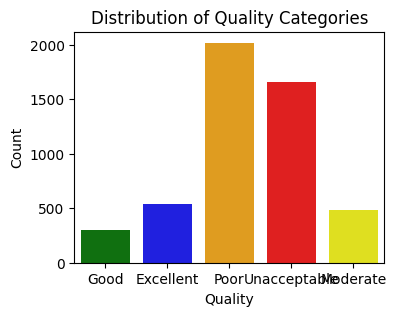

In [9]:
# Calculate value counts of 'Quality' categories
quality_counts = df['Quality'].value_counts()

# Create a custom palette
palette = {'Excellent': 'blue', 'Good': 'green', 'Moderate': 'yellow', 'Poor': 'orange', 'Unacceptable': 'red'}

# Plotting the distribution of 'Quality' categories
plt.figure(figsize=(4, 3))
sns.countplot(x='Quality', data=df, palette=palette)
plt.title('Distribution of Quality Categories')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

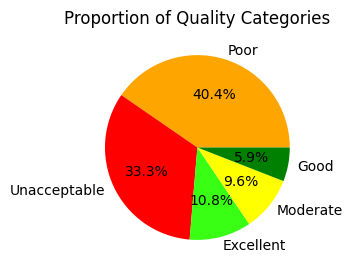

In [10]:
# Plotting a pie chart of 'Quality' categories
plt.figure(figsize=(4, 3))
colors = ['#39FF14' if label == 'Excellent' else 'green' if label == 'Good' else 'yellow' if label == 'Moderate' else 'orange' if label == 'Poor' else 'red' for label in quality_counts.index]
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Proportion of Quality Categories')
plt.show()

In [11]:
# Feature and target selection
X = df[['Temperature (°C)', 'pH', 'TDS (ppm)', 'EC (NTU)']]
y = df['Quality']

# Encode the target variable
y = y.map({'Unacceptable': 0, 'Poor': 1, 'Moderate': 2, 'Good': 3, 'Excellent': 4})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
param_grid = {
    'n_estimators': [250, 300, 350],
    'max_depth': [None, 3, 5],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [5, 10],
    'criterion': ['gini'],
    'max_features': [0.5, 0.7],
    'bootstrap': [True]
}

In [13]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [14]:
# Initialize GridSearchCV with the defined parameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [15]:
# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini'],
                         'max_depth': [None, 3, 5], 'max_features': [0.5, 0.7],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [10, 20],
                         'n_estimators': [250, 300, 350]},
             scoring='accuracy', verbose=1)

In [16]:
# Print the best parameters and best score found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Print classification report and accuracy score for the best model
print("Test set accuracy of best model: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best parameters found:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 350}
Best cross-validation accuracy: 1.00
Test set accuracy of best model: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       487
           1       1.00      1.00      1.00       612
           2       1.00      0.99      1.00       143
           3       0.98      1.00      0.99        88
           4       1.00      0.99      1.00       170

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [17]:
joblib.dump(best_model, 'waterquality_model.pkl')

['waterquality_model.pkl']